# ANÁLISIS PARTE III

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 10)

# Cargar datos
# Ajusta las rutas si es necesario
df_demanda = pd.read_csv('../data/processed/CO280_trafico_total_ccaa_tipo_desplaz_y_mercancia_clean.csv')
df_oferta  = pd.read_csv('../data/processed/CO516_superficies_logisticas_clean.csv')

print(f"Demanda cargada: {df_demanda.shape} filas")
print(f"Oferta cargada:  {df_oferta.shape} filas")
print(f"Demanda: {df_demanda['Año'].min()}-{df_demanda['Año'].max()}")
print(f"Oferta:  {df_oferta['Año'].min()}-{df_oferta['Año'].max()}")
print(f"Regiones: {df_demanda['CCAA'].unique()}")
print(f"Regiones: {df_oferta['CCAA'].unique()}")

Demanda cargada: (6353, 7) filas
Oferta cargada:  (10400, 6) filas
Demanda: 2017-2024
Oferta:  2017-2024
Regiones: ['Andalucía' 'Aragón' 'Asturias, Principado de' 'Cantabria'
 'Castilla - La Mancha' 'Castilla y León' 'Cataluña'
 'Comunitat Valenciana' 'Extremadura' 'Galicia' 'Madrid, Comunidad de'
 'Murcia, Región de' 'Navarra, Comunidad Foral de' 'País Vasco'
 'Rioja, La']
Regiones: ['Andalucía' 'Aragón' 'Asturias, Principado de' 'Balears, Illes'
 'Canarias' 'Cantabria' 'Castilla - La Mancha' 'Castilla y León'
 'Cataluña' 'Ceuta' 'Comunitat Valenciana' 'Extremadura' 'Galicia'
 'Madrid, Comunidad de' 'Melilla' 'Murcia, Región de'
 'Navarra, Comunidad Foral de' 'País Vasco' 'Rioja, La']


In [2]:
# 2. Agrupación TOTAL (Año + CCAA)
# Sumamos toneladas
demanda_full = df_demanda.groupby(['Año', 'CCAA'])['Toneladas(miles)'].sum().reset_index()
# Sumamos metros cuadrados
oferta_full = df_oferta.groupby(['Año', 'CCAA'])['Superficie_m2'].sum().reset_index()

# 3. Merge TOTAL
df_saturacion = pd.merge(demanda_full, oferta_full, on=['Año', 'CCAA'], how='inner')

# 4. KPI
df_saturacion['Saturacion_Ton_por_m2'] = (df_saturacion['Toneladas(miles)'] * 1000) / df_saturacion['Superficie_m2']

print(f"✅ Cálculo completado.")
print(f"Total de combinaciones Año-Región: {df_saturacion.shape[0]}")
print("Ejemplo de datos:")
df_saturacion.sample(15)

✅ Cálculo completado.
Total de combinaciones Año-Región: 120
Ejemplo de datos:


,Año,CCAA,Toneladas(miles),Superficie_m2,Saturacion_Ton_por_m2
92,2023,"Asturias, Principado de",46604.63,305918.0,152.343537
119,2024,"Rioja, La",21821.52,464415.0,46.987113
24,2018,Galicia,106128.82,1372948.0,77.299956
93,2023,Cantabria,36607.66,314909.0,116.248377
52,2020,Comunitat Valenciana,232989.49,3596264.0,64.786537
75,2022,Andalucía,263425.41,3146128.0,83.730036
44,2019,"Rioja, La",18247.17,420909.0,43.351817
114,2024,Galicia,108917.90,1421530.0,76.620191
107,2024,"Asturias, Principado de",42139.75,314618.0,133.939412
83,2022,Extremadura,44023.19,182099.0,241.754156


## Calcular la "Densidad Logística" Toneladas por Metro Cuadrado (Ton/m2).
### ¿Qué comunidades están más saturadas?

In [3]:
# 1. Preparar la DEMANDA (Todo el histórico)
# Agrupamos por Año Y por Comunidad
demanda_historica = df_demanda.groupby(['Año', 'CCAA'])['Toneladas(miles)'].sum().reset_index()

# 2. Preparar la OFERTA (Todo el histórico)
# Sumamos toda la superficie logística disponible por año y región
oferta_historica = df_oferta.groupby(['Año', 'CCAA'])['Superficie_m2'].sum().reset_index()

# 3. Unir (Merge) usando DOS claves: Año y CCAA
# Esto asegura que cruzamos datos de 2017 con 2017, 2018 con 2018, etc.
df_saturacion = pd.merge(
    demanda_historica,
    oferta_historica,
    on=['Año', 'CCAA'],
    how='inner' # Solo nos quedamos con registros donde tengamos ambos datos
)

In [4]:
# 4. Calcular el KPI de Saturación (Para cada año)
df_saturacion['Saturacion_Ton_por_m2'] = (df_saturacion['Toneladas(miles)'] * 1000) / df_saturacion['Superficie_m2']

print("Dataset Histórico Generado:")
df_saturacion.head()

Dataset Histórico Generado:


,Año,CCAA,Toneladas(miles),Superficie_m2,Saturacion_Ton_por_m2
0,2017,Andalucía,233184.62,3105206.0,75.094734
1,2017,Aragón,94869.55,1032102.0,91.918774
2,2017,"Asturias, Principado de",44925.45,366201.0,122.679758
3,2017,Cantabria,27796.10,295891.0,93.940336
4,2017,Castilla - La Mancha,116853.26,3125953.0,37.381643


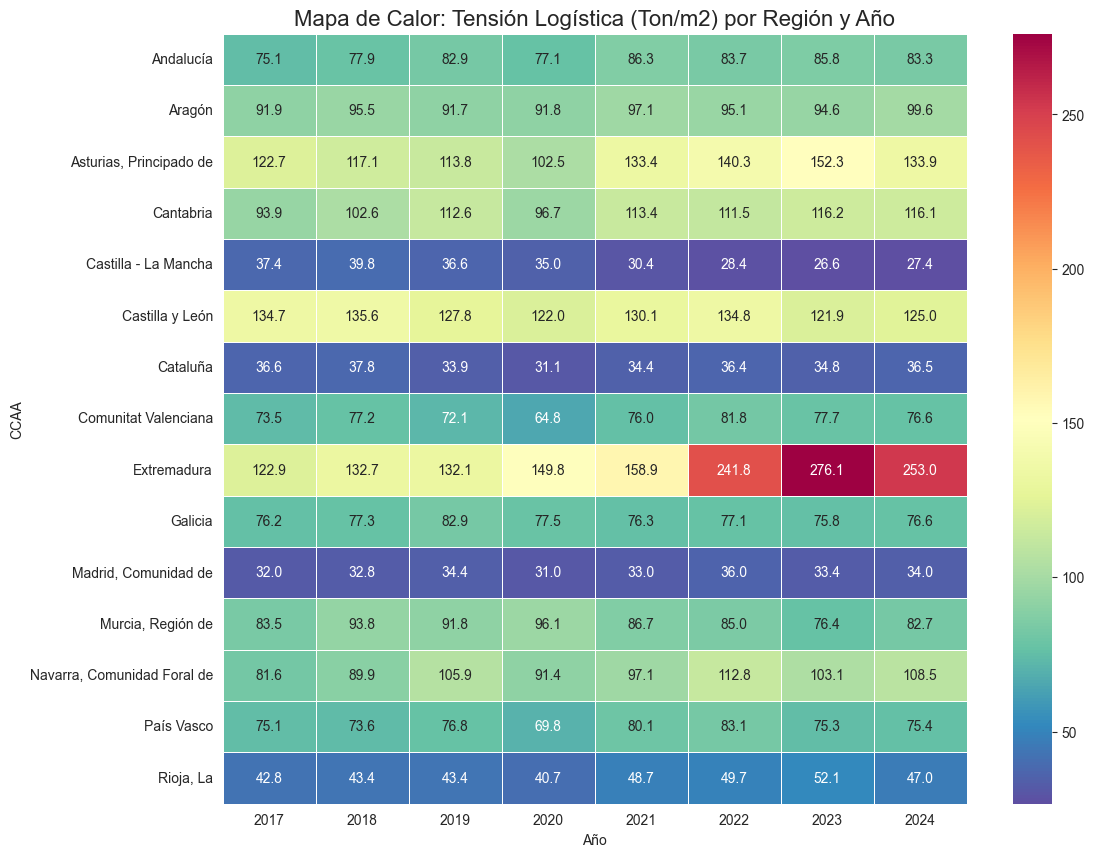

In [5]:
# Para el Heatmap, necesitamos pivotar los datos (formato matriz)
matriz_saturacion = df_saturacion.pivot(index="CCAA", columns="Año", values="Saturacion_Ton_por_m2")

# Dibujamos
plt.figure(figsize=(12, 10))
sns.heatmap(
    matriz_saturacion, 
    cmap='Spectral_r', # Rojo = Alta saturación (Malo/Oportunidad), Verde = Baja (Holgura)
    annot=True,      # Escribir el número dentro de la celda
    fmt=".1f",       # Un decimal
    linewidths=.5    # Líneas entre cuadros
)

plt.title('Mapa de Calor: Tensión Logística (Ton/m2) por Región y Año', fontsize=16)
plt.show()

In [6]:
# Exportamos el DataFrame completo, sin filtrar nada.
df_saturacion.to_csv('../data/processed/KPI_Saturacion_Logistica_Historico.csv', index=False)

print("✅ Archivo 'KPI_Saturacion_Logistica_Historico.csv' generado con éxito.")
print("   - Contiene todas las CCAA.")
print("   - Contiene todos los años (2017-2024).")
print("   - Listo para filtrar dinámicamente en tu Dashboard.")

✅ Archivo 'KPI_Saturacion_Logistica_Historico.csv' generado con éxito.
   - Contiene todas las CCAA.
   - Contiene todos los años (2017-2024).
   - Listo para filtrar dinámicamente en tu Dashboard.
